In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_prime(z):
    g_z = sigmoid(z)
    return g_z * (1 - g_z)

In [4]:
class LogisticModel:
    def __init__(self):
#         path = "MachineLearning/ProblemSets/ps1/"
        path = ""
        self.df = pd.read_table(path + 'logistic_x.txt', header=None,
                                names=["x1","x2"], dtype=float, sep="\s+")
        self.df["label"] = pd.read_table(path + 'logistic_y.txt',
                                names=["label"], dtype=float, squeeze=True)
        
        self.m, self.n = self.df.shape
        self.theta = np.zeros(self.n)
        self.X = self.df[["x1", "x2"]]
        self.X.insert(0, 'intercept', 1)
        self.Y = self.df["label"]

    def sigmoid_z(self):
        z = self.Y * self.X.dot(self.theta)
        return sigmoid(z)
    
    def loss(self):
        return -np.average(
            np.log(self.sigmoid_z())
        )
    
    def gradient(self):
        return -np.average(
            self.X.T * (1 - self.sigmoid_z()) * self.Y,
            axis=-1
        )
    
    def hessian(self):
        return 1/self.m * np.matmul(self.X.T,
                         self.X.mul(self.sigmoid_z() * (1-self.sigmoid_z()), axis=0))

model = LogisticModel()
model.df


x1        x2  label
0   1.343250 -1.331148   -1.0
1   1.820553 -0.634668   -1.0
2   0.986321 -1.888576   -1.0
3   1.944373 -1.635452   -1.0
4   0.976734 -1.353315   -1.0
..       ...       ...    ...
94  4.774854  0.099415    1.0
95  5.827485 -0.690058    1.0
96  2.289474  1.970760    1.0
97  2.494152  1.415205    1.0
98  2.084795  1.356725    1.0

[99 rows x 3 columns]

In [5]:
model.df.describe()
np.matmul(np.linalg.inv(model.hessian()), model.gradient())


array([ 1.50983811, -0.43509696, -0.62161752])

Consider the averge empirical loss(the risk) for logistic regression:

$J(\theta) = \frac 1 m \sum_{i=1}^m \log (1+e^{-y^{(i)} \theta^T x^{(i}}) = - \frac 1 m \sum_{i=1}^m \log (h_\theta(y^{(i)}  x^{(i}))$
Implement Newton's method for optimizing $J(\theta)$, and apply it to fit a logistic model to the data.

In [6]:
def fisher_scoring(model):
    i = 0
    while True:
        i += 1
        prev_theta = model.theta
        model.theta = model.theta - np.matmul(np.linalg.inv(model.hessian()), model.gradient())
        print(f"{i} iterations: loss:{model.loss()}  {model.theta}")
        norm = np.linalg.norm(prev_theta-model.theta)
        print(f"norm: {norm}")
        if np.linalg.norm(prev_theta-model.theta) < 1e-15:
            break
            
def fisher_scoring_2(model, n=10):
    for i in range(n):
        model.theta -= np.matmul(np.linalg.inv(model.hessian()), model.gradient())
        print(f"{i} iterations: cost:{model.loss()}  {model.theta}")
        



What are the coefficients $\theta$ resulting from your fit?

In [7]:
model.theta = np.zeros(model.n)
fisher_scoring(model)


1 iterations: loss:0.374724707576039  [-1.50983811  0.43509696  0.62161752]
norm: 1.6897718296372592
2 iterations: loss:0.33425013576955126  [-2.21834632  0.64372727  0.95944716]
norm: 0.8121818438461159
3 iterations: loss:0.3292811994797008  [-2.55431051  0.74137714  1.13493588]
norm: 0.3914124752746682
4 iterations: loss:0.3291475644275535  [-2.61847133  0.75979248  1.1707512 ]
norm: 0.07575270976393514
5 iterations: loss:0.32914743129585516  [-2.62050954  0.76037096  1.17194549]
norm: 0.0024321272611529197
6 iterations: loss:0.329147431295712  [-2.6205116   0.76037154  1.17194674]
norm: 2.4792940248906853e-06
7 iterations: loss:0.329147431295712  [-2.6205116   0.76037154  1.17194674]
norm: 2.641866152742796e-12
8 iterations: loss:0.32914743129571195  [-2.6205116   0.76037154  1.17194674]
norm: 9.222205069512407e-16


In [8]:
model.theta = np.zeros(model.n)
fisher_scoring_2(model)


0 iterations: cost:0.374724707576039  [-1.50983811  0.43509696  0.62161752]
1 iterations: cost:0.33425013576955126  [-2.21834632  0.64372727  0.95944716]
2 iterations: cost:0.3292811994797008  [-2.55431051  0.74137714  1.13493588]
3 iterations: cost:0.3291475644275535  [-2.61847133  0.75979248  1.1707512 ]
4 iterations: cost:0.32914743129585516  [-2.62050954  0.76037096  1.17194549]
5 iterations: cost:0.329147431295712  [-2.6205116   0.76037154  1.17194674]
6 iterations: cost:0.329147431295712  [-2.6205116   0.76037154  1.17194674]
7 iterations: cost:0.32914743129571195  [-2.6205116   0.76037154  1.17194674]
8 iterations: cost:0.32914743129571195  [-2.6205116   0.76037154  1.17194674]
9 iterations: cost:0.329147431295712  [-2.6205116   0.76037154  1.17194674]


Plot the training data and the decision boundary fit by logistic regression.

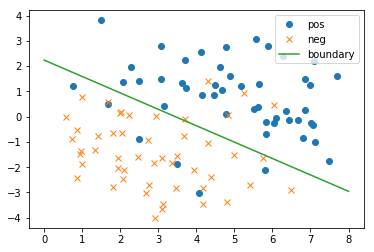

[-2.6205116   0.76037154  1.17194674]


In [9]:
pos = model.df[model.df["label"] == 1]
neg = model.df[model.df["label"] != 1]

plt.plot(pos["x1"], pos["x2"], 'o', label="pos")
plt.plot(neg["x1"], neg["x2"], 'x', label="neg")

x1 = np.arange(9)
x2 = - (model.theta[0] + model.theta[1] * x1) / model.theta[2]
plt.plot(x1, x2, label="boundary")

plt.legend()
plt.show()
print(model.theta)
